In [ ]:
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 100.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.2
    Uninstalling tensorboard-2.11.2:
      Successfully uninstalled tensorboard-2.11.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.11.0
    Uninstalling tensorflow-2.11.0:
      Successfully uninstalled tensorflow-2.11.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from tensorflow import keras

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.4
    Uninstalling gdown-4.6.4:
      Successfully uninstalled gdown-4.6.4


In [ ]:
! gdown --id 1Jg86ISajpIx38N_G2HvfxQf73dD9XAKm

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1Jg86ISajpIx38N_G2HvfxQf73dD9XAKm
From (redirected): https://drive.google.com/uc?id=1Jg86ISajpIx38N_G2HvfxQf73dD9XAKm&confirm=t&uuid=b32ddc6e-828b-46ea-8ac0-c418bbfc6a13
To: /content/preset.zip
100% 26.9M/26.9M [00:00<00:00, 39.2MB/s]


In [ ]:
!unzip 'preset.zip'

Archive:  preset.zip
   creating: preset/
   creating: preset/Train/
   creating: preset/Train/Female/
  inflating: preset/Train/Female/160001.jpg  
  inflating: preset/Train/Female/160004.jpg  
  inflating: preset/Train/Female/160005.jpg  
  inflating: preset/Train/Female/160009.jpg  
  inflating: preset/Train/Female/160016.jpg  
  inflating: preset/Train/Female/160022.jpg  
  inflating: preset/Train/Female/160027.jpg  
  inflating: preset/Train/Female/160029.jpg  
  inflating: preset/Train/Female/160041.jpg  
  inflating: preset/Train/Female/160043.jpg  
  inflating: preset/Train/Female/160048.jpg  
  inflating: preset/Train/Female/160049.jpg  
  inflating: preset/Train/Female/160050.jpg  
  inflating: preset/Train/Female/160051.jpg  
  inflating: preset/Train/Female/160053.jpg  
  inflating: preset/Train/Female/160063.jpg  
  inflating: preset/Train/Female/160069.jpg  
  inflating: preset/Train/Female/160070.jpg  
  inflating: preset/Train/Female/160071.jpg  
  inflating: preset/Tra

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_dir = 'preset/Train/'

In [ ]:
valid_dir = 'preset/Validation'

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(96, 96),
    batch_size=32,
    class_mode='binary'
)

valid_gen = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(96, 96),
    batch_size=32,
    class_mode='binary'
)

Found 3561 images belonging to 2 classes.
Found 852 images belonging to 2 classes.


In [ ]:
kernel_s = (3, 3)

model = models.Sequential()

model.add(layers.Conv2D(32, kernel_s, activation='relu', input_shape=(96, 96, 3),
                        kernel_regularizer=regularizers.l2(0.001), padding="VALID"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, kernel_s, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, kernel_s, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, kernel_s, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, kernel_s, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    epochs=30,
    validation_data=valid_gen,
    validation_steps=len(valid_gen)
)


Epoch 1/30
112/112 [==============================] - 24s 121ms/step - loss: 0.6670 - acc: 0.5948 - val_loss: 0.5205 - val_acc: 0.7594
Epoch 2/30
112/112 [==============================] - 13s 118ms/step - loss: 0.5455 - acc: 0.7338 - val_loss: 0.4592 - val_acc: 0.8192
Epoch 3/30
112/112 [==============================] - 15s 137ms/step - loss: 0.4794 - acc: 0.7810 - val_loss: 0.4710 - val_acc: 0.7793
Epoch 4/30
112/112 [==============================] - 13s 118ms/step - loss: 0.4256 - acc: 0.8079 - val_loss: 0.3666 - val_acc: 0.8474
Epoch 5/30
112/112 [==============================] - 13s 118ms/step - loss: 0.3842 - acc: 0.8332 - val_loss: 0.3483 - val_acc: 0.8474
Epoch 6/30
112/112 [==============================] - 13s 117ms/step - loss: 0.3195 - acc: 0.8616 - val_loss: 0.2708 - val_acc: 0.8920
Epoch 7/30
112/112 [==============================] - 13s 115ms/step - loss: 0.2759 - acc: 0.8826 - val_loss: 0.3273 - val_acc: 0.8721
Epoch 8/30
112/112 [==============================] - 1

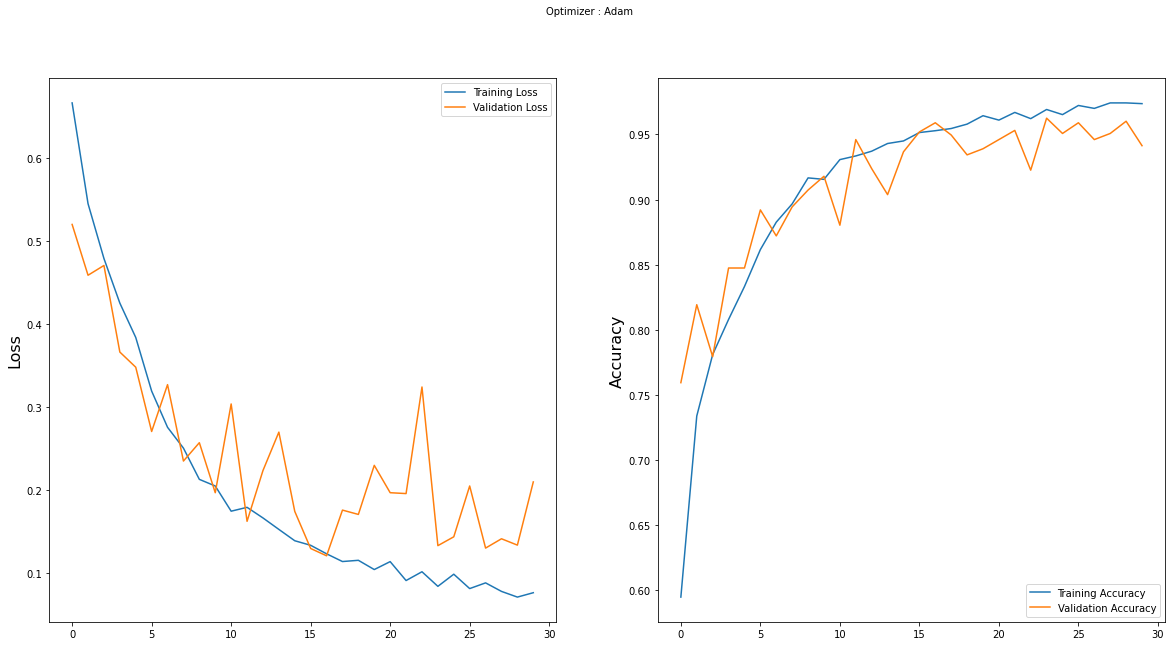

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:

model.save('prese.h5')

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
!cp prese.h5 '/content/gdrive/My Drive/'
!ls -lt '/content/gdrive/My Drive/'

total 6012359
-rw------- 1 root root    2554432 Mar 28 12:59  prese.h5
-rw------- 1 root root    8845856 Mar 23 06:30  correct.h5
-rw------- 1 root root   26869925 Mar 23 05:35  preset.zip
-rw------- 1 root root  331875400 Mar 22 18:03  pre.h5
-rw------- 1 root root  180456912 Mar 21 04:55  free.h5
-rw------- 1 root root  270626528 Mar 20 06:29  gender.h5
-rw------- 1 root root  264685444 Mar 18 07:01  NewMF.zip
-rw------- 1 root root 1415024236 Mar 18 03:39  Dataset.zip
-rw------- 1 root root  271323887 Mar 17 15:59  MFDatasett.zip
-rw------- 1 root root 1415953309 Mar  9 05:55  MFData.zip
-rw------- 1 root root  282512091 Mar  7 06:34  MFDset.zip
-rw------- 1 root root        181 Feb 27 12:01 'What do u think about me . .gform'
-rw------- 1 root root        181 Feb 27 11:57 'Untitled form.gform'
drwx------ 2 root root       4096 Feb 27 11:56 'Untitled form (File responses)'
-rw------- 1 root root  267497807 Feb 15 13:42  Neww_.pdf
-rw------- 1 root root     990099 Feb  2 08:38 'AWS C